In [1]:
import numpy as np
import matplotlib.pyplot as plt

### task 2.2: `robot_controller`

In [2]:
point_i = np.array([[5], [3], [np.pi/8]])
point_s = np.array([[5], [3.5]])

vel_max = 2
rot_vel_max = 0.2

timestep = 1
num_substeps = 10

In [3]:
def trajectory_rollout(origin: np.ndarray, vel: float, rot_vel: float):
    # Given your chosen velocities determine the trajectory of the robot for your given timestep
    # The returned trajectory should be a series of points to check for collisions
    print("TO DO: Implement a way to rollout the controls chosen")


    positions = np.zeros((3, num_substeps))
    positions[:, 0] = np.reshape(origin, (3,))

    for i in range(1, num_substeps):
        theta = positions[2, i-1]

        R = np.matrix([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
        ])

        q_dot = R @ np.array([[vel, 0, rot_vel]]).T
            
        positions[:, i] = positions[:, i-1] + np.reshape(q_dot * timestep, (3,))

    # return np.zeros((3, self.num_substeps))
    return positions

In [4]:
def robot_controller(point_i, point_s):
    R = np.array([
        [0, 1],
        [-1, 0]
    ])

    theta_s = np.arctan2(point_s[1, 0] - point_i[1, 0], point_s[0, 0] - point_i[0, 0])
    # dtheta = theta_s - node_i.point[2, 0]
    dtheta = theta_s - point_i[2, 0]
    dtheta = np.arctan2(np.sin(dtheta), np.cos(dtheta))

    # pi = node_i.point[0:2, 0]
    pi = point_i[0:2]
    ps = np.array(point_s)

    direction = -1 if dtheta < 0 else 1
    Rd = R if dtheta < 0 else R.T 
    Rn = R if dtheta < 0 and dtheta > -np.pi/2 or dtheta > np.pi/2 and dtheta < np.pi else R.T 

    d = Rd @ np.array([[np.cos(point_i[2, 0]), np.sin(point_i[2, 0])]]).T
    l = ps - pi
    m = pi + l/2
    n = Rn @ l

    # solve for circle
    coeffs = np.linalg.inv(np.hstack([d, -n])) @ (m-pi)
    c = pi + coeffs[0] * d
    r = np.linalg.norm(c - pi)

    arc_angle = 2 * np.arccos(np.dot(d[:,0], n[:,0]) / np.linalg.norm(d) / np.linalg.norm(n))
    s = r * arc_angle 

    # speeds
    v = vel_max
    w = direction * arc_angle * v / s 

    max_retry = 10
    i = 0
    while w > rot_vel_max and i < max_retry:
        v = v * rot_vel_max / w 
        w = arc_angle * v / s 
        i += 1

    return v, w

In [5]:
def simulate_trajectory(node_i, point_s):
    #Simulates the non-holonomic motion of the robot.
    #This function drives the robot from node_i towards point_s. This function does has many solutions!
    #node_i is a 3 by 1 vector [x;y;theta] this can be used to construct the SE(2) matrix T_{OI} in course notation
    #point_s is the sampled point vector [x; y]
    print("TO DO: Implment a method to simulate a trajectory given a sampled point")
    vel, rot_vel = robot_controller(node_i, point_s)

    robot_traj = trajectory_rollout(node_i, vel, rot_vel)
    return robot_traj

In [6]:
point_i = np.array([[4.2], [3], [np.pi/8 * 7]])
point_s = np.array([[4], [2]])

In [7]:
R = np.array([
    [0, 1],
    [-1, 0]
])

theta_s = np.arctan2(point_s[1, 0] - point_i[1, 0], point_s[0, 0] - point_i[0, 0])
# dtheta = theta_s - node_i.point[2, 0]
dtheta = theta_s - point_i[2, 0]
dtheta = np.arctan2(np.sin(dtheta), np.cos(dtheta))

# pi = node_i.point[0:2, 0]
pi = point_i[0:2]
ps = np.array(point_s)

direction = -1 if dtheta < 0 else 1
Rd = R if dtheta < 0 else R.T 
Rn = R if dtheta < 0 and dtheta > -np.pi/2 or dtheta > np.pi/2 and dtheta < np.pi else R.T 

d = Rd @ np.array([[np.cos(point_i[2, 0]), np.sin(point_i[2, 0])]]).T
l = ps - pi
m = pi + l/2
n = Rn @ l

# solve for circle
coeffs = np.linalg.inv(np.hstack([d, -n])) @ (m-pi)
c = pi + coeffs[0] * d
r = np.linalg.norm(c - pi)

arc_angle = 2 * np.arccos(np.dot(d[:,0], n[:,0]) / np.linalg.norm(d) / np.linalg.norm(n))
s = r * arc_angle 

# speeds
v = vel_max / 2 
w = direction * arc_angle * v / s 

In [8]:
traj = (simulate_trajectory(point_i, point_s))

TO DO: Implment a method to simulate a trajectory given a sampled point
TO DO: Implement a way to rollout the controls chosen


In [9]:
d

array([[-0.38268343],
       [-0.92387953]])

(3.413600599293089, 4.237447590509853, 1.9470154430707796, 3.1126756955136297)

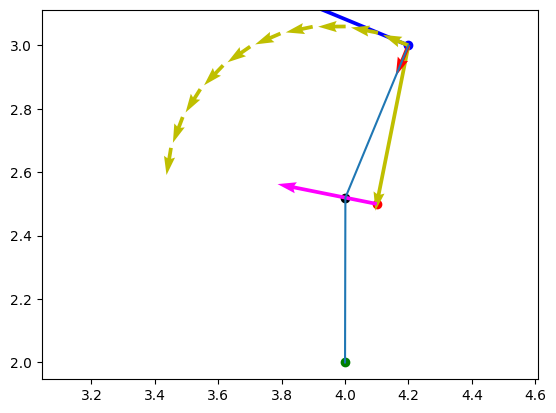

In [10]:
fig, ax = plt.subplots()

plt.scatter(point_i[0], point_i[1], c='b')
plt.scatter(point_s[0], point_s[1], c='g')
plt.scatter(*m, c='r')
plt.scatter(*c, c='black')

scale = 3

plt.quiver(*point_i[0:2], np.cos(point_i[2]), np.sin(point_i[2]), color='b', scale=scale) # heading
plt.quiver(*point_i[0:2], *l, color='y', scale=scale)    # l
plt.quiver(*m, *np.array(n), color='magenta', scale=5) # n
plt.quiver(*point_i[0:2], *np.array(d), color='r', scale=15)   # d

lines = np.hstack([pi, c, ps])
plt.plot(*lines)

plt.quiver(traj[0], traj[1], np.cos(traj[2]), np.sin(traj[2]), color='y')

ax.axis('equal')

In [11]:
np.rad2deg(dtheta)

101.19006752597979

In [12]:
point_s[0]

array([4])

In [13]:
d

array([[-0.38268343],
       [-0.92387953]])